<a href="https://colab.research.google.com/github/mestakindo/Mall.Cluster.Segmentation/blob/main/lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

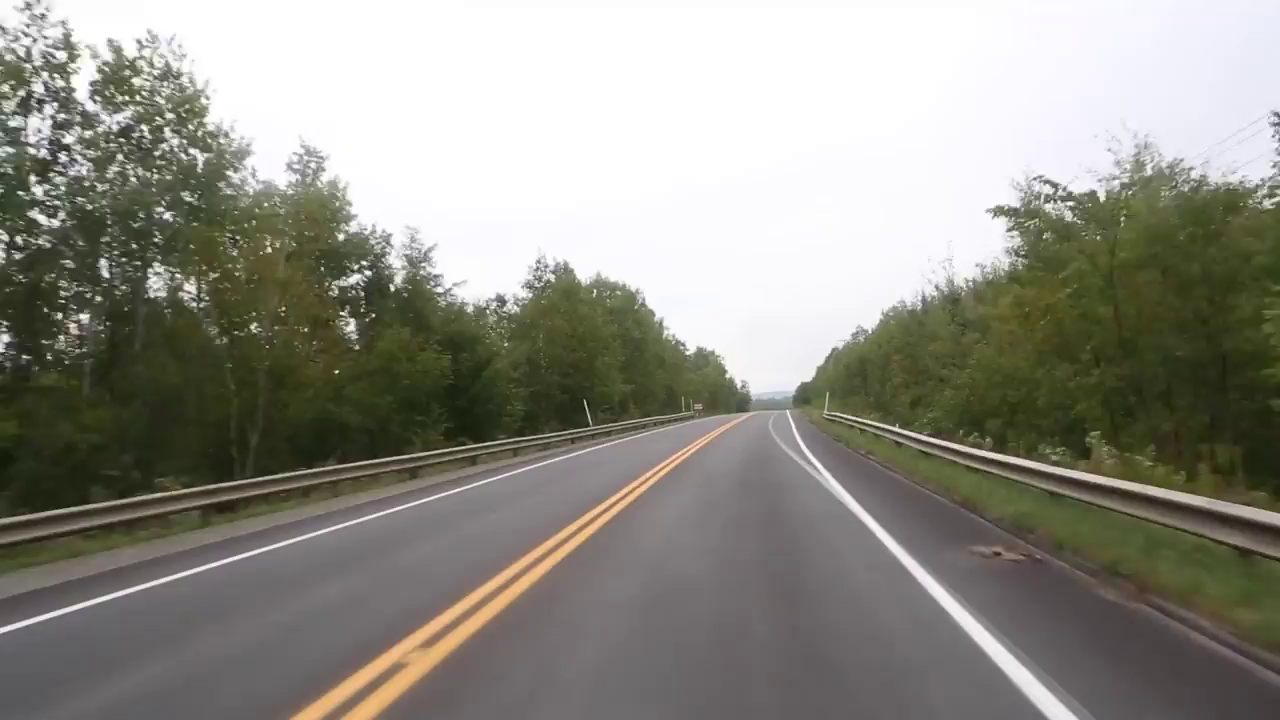

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

capture = cv2.VideoCapture('/content/test1.mp4')
ret, frame = capture.read()
cv2_imshow(frame)

canny edge detection

In [ ]:
def canny(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = 5
  blur = cv2.GaussianBlur(gray, (kernel,kernel),0)
  canny = cv2.Canny(blur, 50,150)
  return canny

In [ ]:
import numpy as np
def region_of_interest(img):
  height = img.shape[0]
  width = img.shape[1]
  mask = np.zeros_like(img)
  triangle = np.array([[(200,height),(800,400),(1000,height),]], np.int32)
  cv2.fillPoly(mask, triangle, 255)
  masked_image = cv2.bitwise_and(img, mask)
  return masked_image

In [ ]:
def houghLines(img):
  houghLines = cv2.HoughLinesP(img, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
  return houghLines

In [ ]:
def display_lines(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      # cv2.line(line_image,(x1,y1),(x2,y2), (255,0,0),10)
      cv2.line(img,(x1,y1),(x2,y2), (255,0,0),10)
  return img

In [ ]:
def display_lines_average(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      for x1,y1,x2,y2 in line:
        cv2.line(img,(x1,y1),(x2,y2), (0,0,255),10)
      # cv2.line(line_image,(x1,y1),(x2,y2), (255,0,0),10)
      # cv2.line(img,(x1,y1),(x2,y2), (255,0,0),10)
  return img

In [ ]:
def make_points(img,lineSI):
  slope, intercept = lineSI
  height = img.shape[0]
  y1 = int(height)
  y2 = int(y1*3.0/5)
  x1 = int((y1-intercept)/slope)
  x2 = int((y2-intercept)/slope)
  return [[x1,y1,x2,y2]]

In [ ]:
def average_slope_intercept(img, lines):
  left_fit = []
  right_fit = []
  for line in lines:
    for x1, y1, x2, y2 in line:
      fit = np.polyfit((x1,x2),(y1,y2),1)
      slope = fit[0]
      intercept = fit[1]
      if slope < 0 :
        left_fit.append((slope, intercept))
      else:
        right_fit.append((slope, intercept))
  left_fit_average = np.average(left_fit, axis = 0)
  right_fit_average = np.average(right_fit, axis = 0)
  left_line = make_points(img, left_fit_average)
  right_line = make_points(img, right_fit_average)
  average_lines = [left_line,right_line]
  return average_lines

[[[334, 720, 707, 432]], [[1064, 720, 778, 432]]]


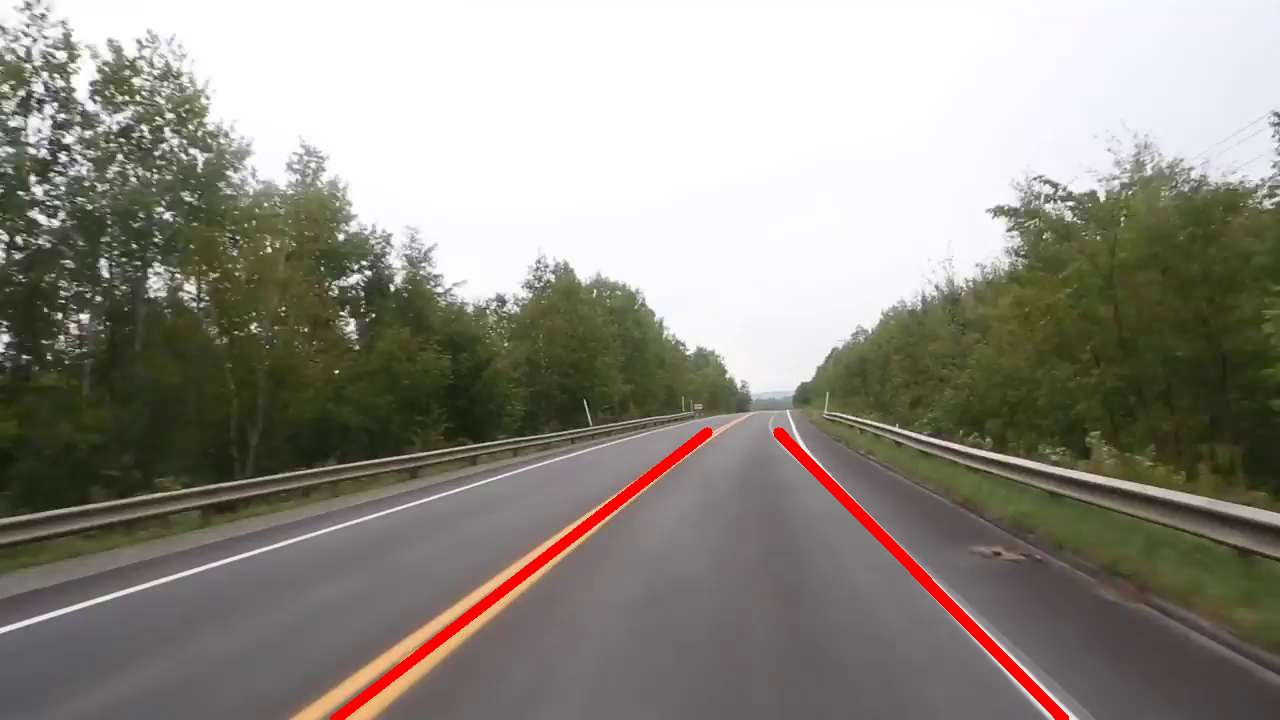

In [ ]:
canny_output = canny(frame)
masked_output = region_of_interest(canny_output)
lines = houghLines(masked_output)
average_lines = average_slope_intercept(frame,lines)
print(average_lines)
line_image = display_lines_average(frame,average_lines)
cv2_imshow(line_image)